In [1]:
# LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/3SC/SALUD/LAB 1/practica_micro.csv")
df.head()

,MALDI_binned,Erythromycin,Ciprofloxacin
0,"[0.0002535866911222, 0.0003949856891622, 0.000...",0.0,0.0
1,"[0.0003393276603384, 0.0002025633325117, 9.727...",0.0,0.0
2,"[0.0001225308701019, 0.0001617988864636, 8.873...",1.0,0.0
3,"[0.0002821877594324, 0.0006081195988659, 0.000...",0.0,1.0
4,"[0.0003700831426878, 0.0002433899375037, 0.000...",0.0,0.0


### PREPARACIÓN DE DATOS

In [4]:
# Crear la clase para cuando no pertenezca a ninguna
# df['Sin_Resistencia'] = np.where((df['Erythromycin'] == 0) & (df['Ciprofloxacin'] == 0), 1.0, 0.0)
df['Clase'] = np.where((df['Erythromycin'] == 1) & (df['Ciprofloxacin'] == 1), 3.0,
                       np.where((df['Erythromycin'] == 1), 1,
                                np.where((df['Ciprofloxacin'] == 1), 2, 0)))
df.head()

,MALDI_binned,Erythromycin,Ciprofloxacin,Clase
0,"[0.0002535866911222, 0.0003949856891622, 0.000...",0.0,0.0,0.0
1,"[0.0003393276603384, 0.0002025633325117, 9.727...",0.0,0.0,0.0
2,"[0.0001225308701019, 0.0001617988864636, 8.873...",1.0,0.0,1.0
3,"[0.0002821877594324, 0.0006081195988659, 0.000...",0.0,1.0,2.0
4,"[0.0003700831426878, 0.0002433899375037, 0.000...",0.0,0.0,0.0


### Separamos las proteinas en columnas

In [5]:
#Separamos las proteinas por columnas
maldi_data = df['MALDI_binned'].apply(lambda x: pd.Series(eval(x)))
maldi_data = maldi_data.add_prefix('Proteina_')
df = pd.concat([df, maldi_data], axis=1)
df['MALDI_binned'] = maldi_data.values.tolist()

#Vemos como queda
df.head()

,MALDI_binned,Erythromycin,Ciprofloxacin,Clase,Proteina_0,Proteina_1,Proteina_2,Proteina_3,Proteina_4,Proteina_5,...,Proteina_5990,Proteina_5991,Proteina_5992,Proteina_5993,Proteina_5994,Proteina_5995,Proteina_5996,Proteina_5997,Proteina_5998,Proteina_5999
0,"[0.0002535866911222, 0.0003949856891622, 0.000...",0.0,0.0,0.0,0.000254,0.000395,0.000453,0.000495,0.000801,0.000879,...,3.847418e-07,0.000005,0.000023,0.000062,0.000061,0.000056,0.000071,0.000052,0.000044,0.000025
1,"[0.0003393276603384, 0.0002025633325117, 9.727...",0.0,0.0,0.0,0.000339,0.000203,0.000097,0.000844,0.000769,0.000667,...,6.344351e-05,0.000070,0.000056,0.000074,0.000096,0.000154,0.000075,0.000067,0.000042,0.000022
2,"[0.0001225308701019, 0.0001617988864636, 8.873...",1.0,0.0,1.0,0.000123,0.000162,0.000089,0.000671,0.000563,0.001250,...,1.657958e-05,0.000006,0.000029,0.000055,0.000112,0.000084,0.000072,0.000060,0.000046,0.000003
3,"[0.0002821877594324, 0.0006081195988659, 0.000...",0.0,1.0,2.0,0.000282,0.000608,0.000158,0.000486,0.000495,0.000468,...,4.959213e-05,0.000073,0.000037,0.000015,0.000003,0.000004,0.000021,0.000036,0.000045,0.000096
4,"[0.0003700831426878, 0.0002433899375037, 0.000...",0.0,0.0,0.0,0.000370,0.000243,0.000149,0.000620,0.000307,0.000999,...,6.183159e-05,0.000086,0.000050,0.000037,0.000025,0.000051,0.000056,0.000078,0.000099,0.000140


In [6]:
# #Comprobamos que no hay ninguno que tenga diferente
# for i in range (len(df['MALDI_binned'])):
#   langitu = len(eval(df.iloc[i]['MALDI_binned']))
#   if(langitu != 6000):
#     print(i," --> ",langitu)
# #

# TODOS TIENEN 6000 PROTEINAS

## PREPROCESADO

#### DIVIDIMOS CONJUNTOS

In [7]:
df.head()

,MALDI_binned,Erythromycin,Ciprofloxacin,Clase,Proteina_0,Proteina_1,Proteina_2,Proteina_3,Proteina_4,Proteina_5,...,Proteina_5990,Proteina_5991,Proteina_5992,Proteina_5993,Proteina_5994,Proteina_5995,Proteina_5996,Proteina_5997,Proteina_5998,Proteina_5999
0,"[0.0002535866911222, 0.0003949856891622, 0.000...",0.0,0.0,0.0,0.000254,0.000395,0.000453,0.000495,0.000801,0.000879,...,3.847418e-07,0.000005,0.000023,0.000062,0.000061,0.000056,0.000071,0.000052,0.000044,0.000025
1,"[0.0003393276603384, 0.0002025633325117, 9.727...",0.0,0.0,0.0,0.000339,0.000203,0.000097,0.000844,0.000769,0.000667,...,6.344351e-05,0.000070,0.000056,0.000074,0.000096,0.000154,0.000075,0.000067,0.000042,0.000022
2,"[0.0001225308701019, 0.0001617988864636, 8.873...",1.0,0.0,1.0,0.000123,0.000162,0.000089,0.000671,0.000563,0.001250,...,1.657958e-05,0.000006,0.000029,0.000055,0.000112,0.000084,0.000072,0.000060,0.000046,0.000003
3,"[0.0002821877594324, 0.0006081195988659, 0.000...",0.0,1.0,2.0,0.000282,0.000608,0.000158,0.000486,0.000495,0.000468,...,4.959213e-05,0.000073,0.000037,0.000015,0.000003,0.000004,0.000021,0.000036,0.000045,0.000096
4,"[0.0003700831426878, 0.0002433899375037, 0.000...",0.0,0.0,0.0,0.000370,0.000243,0.000149,0.000620,0.000307,0.000999,...,6.183159e-05,0.000086,0.000050,0.000037,0.000025,0.000051,0.000056,0.000078,0.000099,0.000140


In [8]:
from sklearn.model_selection import train_test_split

data, test = train_test_split(df, test_size=0.2, random_state=42,stratify=df['Clase'])
train, val = train_test_split(data, test_size=0.2, random_state=42,stratify=data['Clase'])

In [9]:
print(train['Clase'].value_counts())
print(val['Clase'].value_counts())
print(test['Clase'].value_counts())


Clase
0.0    849
1.0    183
2.0     38
3.0     37
Name: count, dtype: int64
Clase
0.0    212
1.0     46
2.0     10
3.0      9
Name: count, dtype: int64
Clase
0.0    266
1.0     58
2.0     12
3.0     11
Name: count, dtype: int64


#### Miramos relación entre clases

In [10]:
print("--------------------------------------------Erythromycin")
for x in train['Erythromycin'].unique():
  print("Valor: ",x)
  df_aux = train[train['Erythromycin'] == x]
  print(df_aux['Clase'].value_counts())

print("\n-----------------------------------------Ciprofloxacin")
for x in train['Ciprofloxacin'].unique():
  print("Valor: ",x)
  df_aux = train[train['Ciprofloxacin'] == x]
  print(df_aux['Clase'].value_counts())

--------------------------------------------Erythromycin
Valor:  0.0
Clase
0.0    849
2.0     38
Name: count, dtype: int64
Valor:  1.0
Clase
1.0    183
3.0     37
Name: count, dtype: int64

-----------------------------------------Ciprofloxacin
Valor:  0.0
Clase
0.0    849
1.0    183
Name: count, dtype: int64
Valor:  1.0
Clase
2.0    38
3.0    37
Name: count, dtype: int64


**Observación**: La mitad de las veces que es resistente a Ciprofloxacin tambien lo es a Erythromycin

#### Miramos el rango de valores

In [11]:
train.head()

,MALDI_binned,Erythromycin,Ciprofloxacin,Clase,Proteina_0,Proteina_1,Proteina_2,Proteina_3,Proteina_4,Proteina_5,...,Proteina_5990,Proteina_5991,Proteina_5992,Proteina_5993,Proteina_5994,Proteina_5995,Proteina_5996,Proteina_5997,Proteina_5998,Proteina_5999
592,"[9.514313397004318e-05, 0.0002021083774691, 3....",0.0,0.0,0.0,9.514313e-05,0.000202,0.000031,0.000196,0.000056,0.000967,...,4.747993e-05,0.000079,0.000047,0.000038,0.000036,0.000055,0.000021,0.000012,0.000003,0.000016
1534,"[0.0001192342407394, 1.327903832972873e-05, 0....",1.0,0.0,1.0,1.192342e-04,0.000013,0.000254,0.000659,0.001105,0.001605,...,4.373141e-07,0.000013,0.000036,0.000084,0.000066,0.000075,0.000055,0.000063,0.000025,0.000027
1151,"[2.227177493243829e-05, 0.0002139957898722, 0....",0.0,0.0,0.0,2.227177e-05,0.000214,0.000122,0.000166,0.000355,0.001104,...,3.601641e-05,0.000058,0.000047,0.000046,0.000041,0.000055,0.000029,0.000028,0.000023,0.000017
1123,"[2.69324103807932e-07, 1.3768326555154077e-05,...",0.0,0.0,0.0,2.693241e-07,0.000014,0.000014,0.000073,0.000272,0.001628,...,2.000176e-05,0.000045,0.000037,0.000053,0.000040,0.000047,0.000015,0.000009,0.000011,0.000017
933,"[0.0005372944301694, 0.000715870387328, 0.0004...",1.0,0.0,1.0,5.372944e-04,0.000716,0.000457,0.000305,0.000061,0.000217,...,5.457613e-05,0.000084,0.000039,0.000041,0.000045,0.000100,0.000085,0.000086,0.000085,0.000104


In [12]:
# Get min and max values for each 'Proteina_' column
columnas_proteina = [col for col in train.columns if col.startswith('Proteina_')]
min_values = np.min(train[columnas_proteina].min())
max_values = np.max(train[columnas_proteina].max())

# Print the results
print("Minimum values for each 'Proteina_' column:")
print(min_values)
print("\nMaximum values for each 'Proteina_' column:")
print(max_values)


Minimum values for each 'Proteina_' column:
0.0

Maximum values for each 'Proteina_' column:
0.0388104330759496


**Observación:** Como son valores muy pequeños sería buena idea multiplicar por un valor constante

In [13]:
# Multiplicamos los datos de las proteinas por 100
# train[columnas_proteina] = train[columnas_proteina] * 100
# train['MALDI_binned'] = train['MALDI_binned'] * 100

# train.head()

In [14]:
# min_values = np.min(train[columnas_proteina].min())
# max_values = np.max(train[columnas_proteina].max())

# # Print the results
# print("Minimum values for each 'Proteina_' column:")
# print(min_values)
# print("\nMaximum values for each 'Proteina_' column:")
# print(max_values)

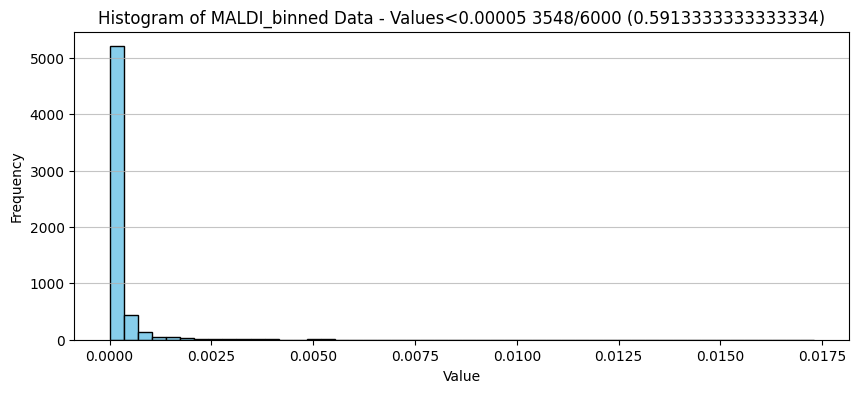

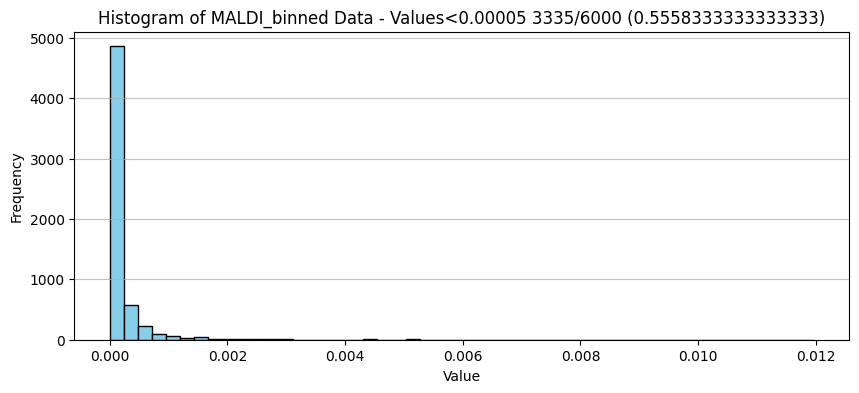

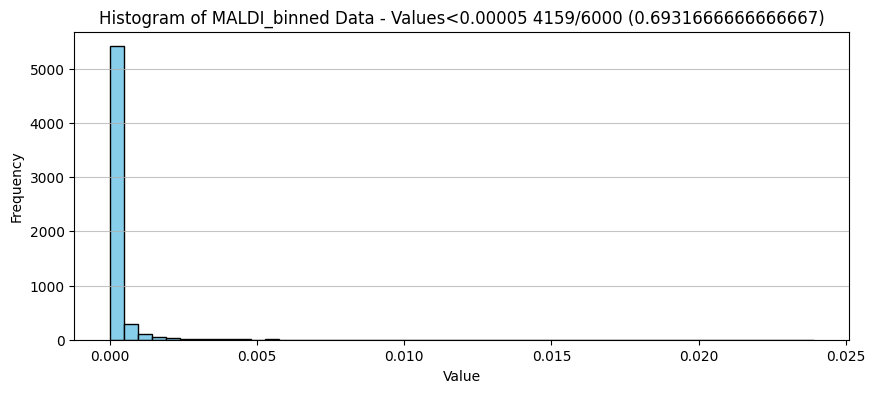

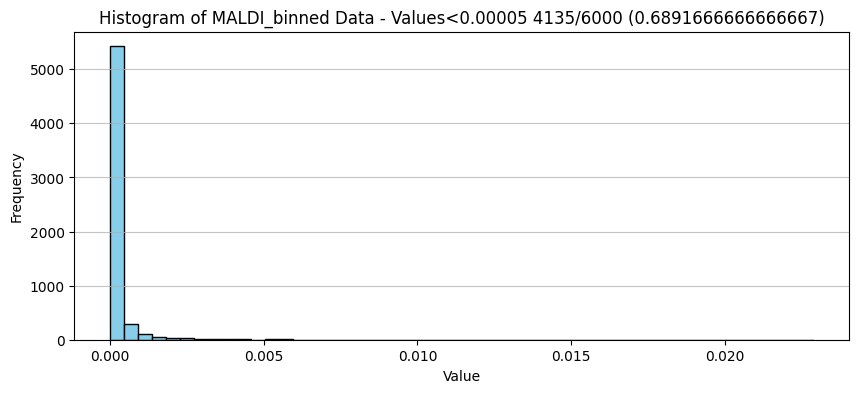

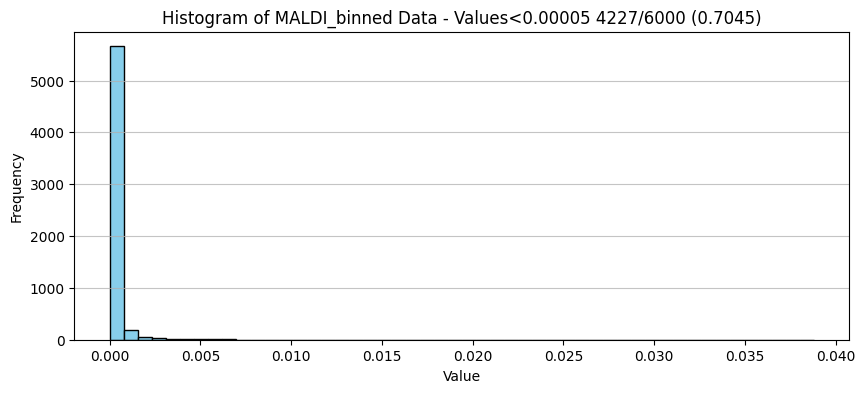

In [15]:
# Generate histograms for the first 5 rows of 'MALDI_binned' data
for i in range(5):
    maldi_values = train['MALDI_binned'].iloc[i]
    values_lower = np.sum([np.array(maldi_values) < 0.0001])
    plt.figure(figsize=(10, 4))
    plt.hist(maldi_values, bins=50, color='skyblue', edgecolor='black')  # You can adjust 'bins' as needed
    plt.title(f'Histogram of MALDI_binned Data - Values<0.00005 {values_lower}/{len(maldi_values)} ({values_lower/len(maldi_values)})')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


**Observación**: parece que hasta el valor de 0.001 podemos eliminar los datos y convertirlos en 0. De esta forma, nos quitamos muchos datos y los picos serán más pronunciados cuando el valor salga de ese rango.

#### SEPARAR X e Y

In [16]:
#Dividimos los labels de los atributos
x_train = train.drop(columns=['Clase','Erythromycin','Ciprofloxacin','MALDI_binned'])
y_train = train[['Clase','Erythromycin','Ciprofloxacin']]

x_val = val.drop(columns=['Clase','Erythromycin','Ciprofloxacin','MALDI_binned'])
y_val = val[['Clase','Erythromycin','Ciprofloxacin']]

x_test = test.drop(columns=['Clase','Erythromycin','Ciprofloxacin','MALDI_binned'])
y_test = test[['Clase','Erythromycin','Ciprofloxacin']]

## REGRESSION LOGISTICA

### Pipeline

In [17]:
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
import numpy as np

# Transformador personalizado para convertir valores menores de 1 a 0
def threshold_transform(X):
    X = np.array(X)
    X[X < 0.0001] = 0
    return X

# Crear una pipeline que primero normaliza los datos por columnas, luego aplica el transformador personalizado y finalmente aplica PCA
pipeline = Pipeline([
    # DIVIDIR
    ('threshold', FunctionTransformer(threshold_transform)),  # Convierte valores a 0
    ('multiplication', FunctionTransformer(lambda X: X * 100)),
    ('scaler', StandardScaler()),  # Normaliza los datos por columnas
    ('selector', SelectKBest(f_classif, k=50))
    # ('pca', PCA(n_components=0.95))  # Aplica PCA
])
print("Pipeline creada con éxito.")

Pipeline creada con éxito.


In [18]:
x_train_pca = pipeline.fit_transform(x_train,y_train['Clase'])
x_val_pca = pipeline.transform(x_val)
x_test_pca = pipeline.transform(x_test)

print(f"Original number of features: {x_train.shape[1]}")
print(f"Reduced number of features after PCA: {x_train_pca.shape[1]}")

Original number of features: 6000
Reduced number of features after PCA: 50


In [19]:
selector = pipeline.named_steps['selector']
selected_indices = selector.get_support(indices=True)
print("Selected feature indices:", selected_indices)

feature_names = x_train.columns
selected_features = feature_names[selected_indices]
print("Selected feature names:", selected_features)

Selected feature indices: [  19   97  111  124  137  145  149  150  153  162  163  166  167  175
  294  349  361  450  531  569  836  837  838  839  849  930  998  999
 1000 1001 1002 1003 1010 1011 1014 1015 1023 1024 1036 1146 1147 1148
 1177 1181 1202 1285 1673 1674 1805 4323]
Selected feature names: Index(['Proteina_19', 'Proteina_97', 'Proteina_111', 'Proteina_124',
       'Proteina_137', 'Proteina_145', 'Proteina_149', 'Proteina_150',
       'Proteina_153', 'Proteina_162', 'Proteina_163', 'Proteina_166',
       'Proteina_167', 'Proteina_175', 'Proteina_294', 'Proteina_349',
       'Proteina_361', 'Proteina_450', 'Proteina_531', 'Proteina_569',
       'Proteina_836', 'Proteina_837', 'Proteina_838', 'Proteina_839',
       'Proteina_849', 'Proteina_930', 'Proteina_998', 'Proteina_999',
       'Proteina_1000', 'Proteina_1001', 'Proteina_1002', 'Proteina_1003',
       'Proteina_1010', 'Proteina_1011', 'Proteina_1014', 'Proteina_1015',
       'Proteina_1023', 'Proteina_1024', 'Proteina

### UNIFICADO

#### Sin Pesos

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Training Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=1234)
lr.fit(x_train_pca, y_train['Clase'])

# Predicting on the test set
y_pred_sw = lr.predict(x_val_pca)

#### Con Pesos

In [21]:
# Cantidad de datos por clase
class_counts = (df['Clase'].value_counts())

# Inversamente proporcional a la cantidad de datos
weight_combinations = [
    None,
    {0: 0.33, 1: 1.5, 2: 20, 3: 25},
    {0: 1/class_counts[0], 1: 1/class_counts[1], 2: 1/class_counts[2], 3: 1/class_counts[3]},
    {0: 1, 1: 1060/227, 2: 1060/49, 3: 1060/48},  # Pesos relativos a la clase 0
    {0: 0.5, 1: 1060/(2*227), 2: 1060/(2*49), 3: 1060/(2*48)},  # Pesos ajustados
    {0: 0.1, 1: 1060/(10*227), 2: 1060/(10*49), 3: 1060/(10*48)},  # Pesos más bajos
    {0: 2, 1: 2*1060/227, 2: 2*1060/49, 3: 2*1060/48}  # Pesos más altos
]

# Inicializa variables para almacenar los mejores pesos y la mejor precisión
best_weights = None
best_precision = -1
class_label_e = '1.0'  # Cambia esto al label de la clase que te interesa
class_label_c = '2.0'  # Cambia esto al label de la clase que te interesa
class_label_both = '3.0'  # Cambia esto al label de la clase que te interesa
y_pred__cw = None

# Itera sobre cada combinación de pesos y encuentra la que tenga la mejor precisión
for weights in weight_combinations:
    lr = LogisticRegression(max_iter=1000, class_weight=weights, random_state=0)
    lr.fit(x_train_pca, y_train['Clase'])
    y_pred = lr.predict(x_val_pca)

    report = classification_report(y_val['Clase'], y_pred, output_dict=True,zero_division=1)
    precision_e = report[str(class_label_e)]['recall']
    precision_c = report[str(class_label_c)]['recall']
    precision_both = report[str(class_label_both)]['recall']
    print(f"Pesos: {weights}, Precisión para la clase {class_label_e}: {precision_e:.2f} -- {class_label_c}: {precision_c:.2f} -- {class_label_both}: {precision_both:.2f}")
    if (precision_e+precision_c+precision_both) > best_precision:
        best_precision = (precision_e+precision_c+precision_both)
        best_weights = weights
        y_pred_cw = y_pred

print(f"Mejores pesos: {best_weights}, Mejor precisión para las clases {best_precision:.2f}")

Pesos: None, Precisión para la clase 1.0: 0.26 -- 2.0: 0.00 -- 3.0: 0.22
Pesos: {0: 0.33, 1: 1.5, 2: 20, 3: 25}, Precisión para la clase 1.0: 0.39 -- 2.0: 0.30 -- 3.0: 0.44
Pesos: {0: 0.0007535795026375283, 1: 0.003484320557491289, 2: 0.016666666666666666, 3: 0.017543859649122806}, Precisión para la clase 1.0: 0.57 -- 2.0: 0.40 -- 3.0: 0.44
Pesos: {0: 1, 1: 4.669603524229075, 2: 21.632653061224488, 3: 22.083333333333332}, Precisión para la clase 1.0: 0.48 -- 2.0: 0.30 -- 3.0: 0.33
Pesos: {0: 0.5, 1: 2.3348017621145374, 2: 10.816326530612244, 3: 11.041666666666666}, Precisión para la clase 1.0: 0.48 -- 2.0: 0.30 -- 3.0: 0.33
Pesos: {0: 0.1, 1: 0.4669603524229075, 2: 2.163265306122449, 3: 2.2083333333333335}, Precisión para la clase 1.0: 0.52 -- 2.0: 0.30 -- 3.0: 0.33
Pesos: {0: 2, 1: 9.33920704845815, 2: 43.265306122448976, 3: 44.166666666666664}, Precisión para la clase 1.0: 0.48 -- 2.0: 0.30 -- 3.0: 0.33
Mejores pesos: {0: 0.0007535795026375283, 1: 0.003484320557491289, 2: 0.016666666

#### Comparación

In [22]:
# Evaluating the model sin pesos
accuracy = accuracy_score(y_val['Clase'], y_pred_sw)
print(f"Accuracy of Logistic Regression model sin pesos: {accuracy:.2f}")
report_sw = classification_report(y_val['Clase'], y_pred_sw, output_dict=True,zero_division=1)
precision_clase_1_sw = report_sw['1.0']['recall']
precision_clase_2_sw = report_sw['2.0']['recall']
precision_clase_3_sw = report_sw['3.0']['recall']
print(f"Precisión de la clase 1 sin pesos: {precision_clase_1_sw:.2f}")
print(f"Precisión de la clase 2 sin pesos: {precision_clase_2_sw:.2f}")
print(f"Precisión de la clase 3 sin pesos: {precision_clase_3_sw:.2f}")

# Evaluating the model con pesos
accuracy = accuracy_score(y_val['Clase'], y_pred_cw)
print(f"Accuracy of Logistic Regression model con pesos: {accuracy:.2f}")
report_cw = classification_report(y_val['Clase'], y_pred_cw, output_dict=True,zero_division=1)
precision_clase_1_cw = report_cw['1.0']['recall']
precision_clase_2_cw = report_cw['2.0']['recall']
precision_clase_3_cw = report_cw['3.0']['recall']
print(f"Precisión de la clase 1 con pesos: {precision_clase_1_cw:.2f}")
print(f"Precisión de la clase 2 con pesos: {precision_clase_2_cw:.2f}")
print(f"Precisión de la clase 3 sin pesos: {precision_clase_3_cw:.2f}")


Accuracy of Logistic Regression model sin pesos: 0.76
Precisión de la clase 1 sin pesos: 0.26
Precisión de la clase 2 sin pesos: 0.00
Precisión de la clase 3 sin pesos: 0.22
Accuracy of Logistic Regression model con pesos: 0.58
Precisión de la clase 1 con pesos: 0.57
Precisión de la clase 2 con pesos: 0.40
Precisión de la clase 3 sin pesos: 0.44


##### Erythromycin

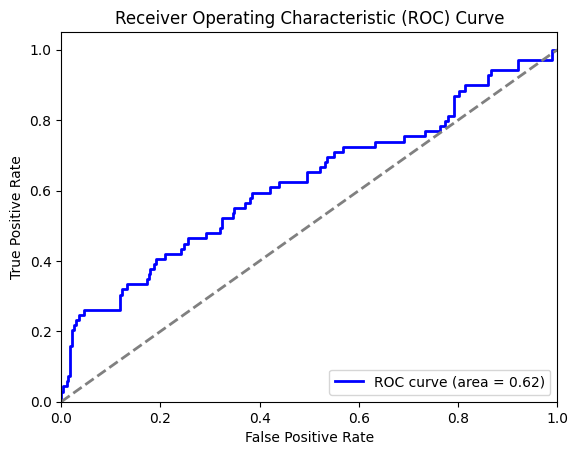

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
lr = LogisticRegression(max_iter=1000, class_weight=best_weights, random_state=0)
lr.fit(x_train_pca, y_train['Clase'])
y_pred = lr.predict_proba(x_test_pca)
unified_prob = (y_pred[:, 1] + y_pred[:, 3])

fpr, tpr, thresholds = roc_curve(y_test['Erythromycin'], unified_prob)
auc_score = roc_auc_score(y_test['Erythromycin'], unified_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##### Ciprofloxacin

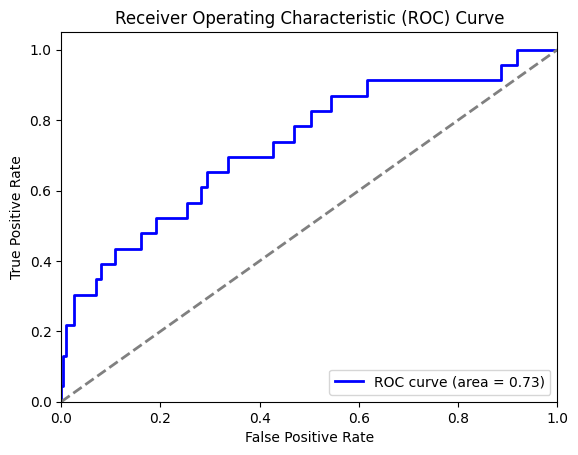

In [24]:
lr = LogisticRegression(max_iter=1000, random_state=0, class_weight = best_weights)
lr.fit(x_train_pca, y_train['Clase'])
y_pred = lr.predict_proba(x_test_pca)
unified_prob = (y_pred[:, 2] + y_pred[:, 3])

fpr, tpr, thresholds = roc_curve(y_test['Ciprofloxacin'], unified_prob)
auc_score = roc_auc_score(y_test['Ciprofloxacin'], unified_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [25]:
print(sum(unified_prob))
print(sum(y_pred[:,2]))
print(sum(y_pred[:,3]))

133.2777797578089
65.53389610709493
67.74388365071407


### DIVIDIDO

#### Erythromycin

In [26]:
# Define diferentes combinaciones de pesos para probar
weight_combinations = [
    {0: 0.5, 1: 15},
    {0: 0.5, 1: 10},
    {0: 0.33, 1: 15},
    {0: 0.33, 1: 3},
    {0: 0.5, 1: 2},
    {0: 1, 1: 1},
    {0: 2, 1: 0.5},
    {0: 3, 1: 0.33}
]

# Inicializa variables para almacenar los mejores pesos y la mejor precisión
best_weights_e = None
best_precision = 0
class_label = '1.0'  # Cambia esto al label de la clase que te interesa
y_pred_Erythromycin_cw = None

# Itera sobre cada combinación de pesos y encuentra la que tenga la mejor precisión
for weights in weight_combinations:
    lr = LogisticRegression(max_iter=1000, class_weight=weights, random_state=0)
    lr.fit(x_train_pca, y_train['Erythromycin'])
    # y_pred = lr.predict(x_test_pca)
    y_pred = lr.predict_proba(x_val_pca)

    precision = roc_auc_score(y_val['Erythromycin'], y_pred[:, 1])

    # report = classification_report(y_test['Erythromycin'], y_pred, output_dict=True)
    # precision = report[str(class_label)]['recall']
    print(f"Pesos: {weights}, AUC para la clase {class_label}: {precision:.2f}")
    if precision >= best_precision:
        best_precision = precision
        best_weights_e = weights
        y_pred_Erythromycin_cw = y_pred

print(f"Mejores pesos: {best_weights_e}, Mejor AUC para la clase {class_label}: {best_precision:.2f}")

Pesos: {0: 0.5, 1: 15}, AUC para la clase 1.0: 0.65
Pesos: {0: 0.5, 1: 10}, AUC para la clase 1.0: 0.65
Pesos: {0: 0.33, 1: 15}, AUC para la clase 1.0: 0.64
Pesos: {0: 0.33, 1: 3}, AUC para la clase 1.0: 0.67
Pesos: {0: 0.5, 1: 2}, AUC para la clase 1.0: 0.68
Pesos: {0: 1, 1: 1}, AUC para la clase 1.0: 0.69
Pesos: {0: 2, 1: 0.5}, AUC para la clase 1.0: 0.70
Pesos: {0: 3, 1: 0.33}, AUC para la clase 1.0: 0.70
Mejores pesos: {0: 3, 1: 0.33}, Mejor AUC para la clase 1.0: 0.70


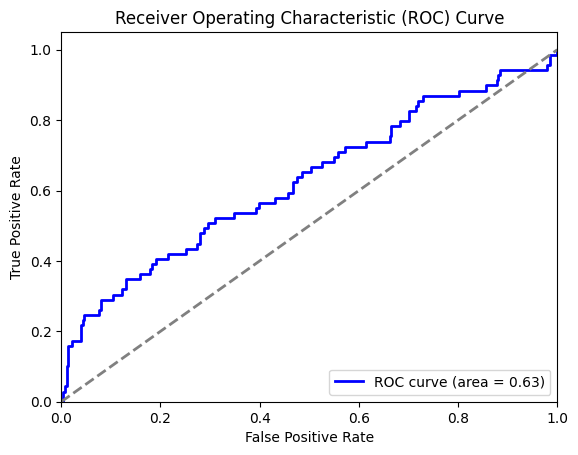

In [27]:
lr = LogisticRegression(max_iter=1000, class_weight=best_weights_e, random_state=0)
lr.fit(x_train_pca, y_train['Erythromycin'])
y_pred = lr.predict_proba(x_test_pca)

fpr, tpr, thresholds = roc_curve(y_test['Erythromycin'], y_pred[:, 1])
auc_score = roc_auc_score(y_test['Erythromycin'], y_pred[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Ciprofloxacin

In [28]:
# Training Logistic Regression model for 'Ciprofloxacin'
# Define diferentes combinaciones de pesos para probar
weight_combinations = [
    None,
    {0: 0.5, 1: 60},
    {0: 0.5, 1: 10},
    {0: 0.33, 1: 15},
    {0: 0.33, 1: 3},
    {0: 0.5, 1: 2},
    {0: 1, 1: 1},
    {0: 2, 1: 0.5},
    {0: 3, 1: 0.33}
]

# Inicializa variables para almacenar los mejores pesos y la mejor precisión
best_weights = None
best_precision = 0
class_label = '1.0'  # Cambia esto al label de la clase que te interesa
y_pred_Ciprofloxacin_cw = None

# Itera sobre cada combinación de pesos y encuentra la que tenga la mejor precisión
for weights in weight_combinations:
    lr = LogisticRegression(max_iter=1000, class_weight=weights, random_state=0)
    lr.fit(x_train_pca, y_train['Ciprofloxacin'])
    y_pred = lr.predict_proba(x_val_pca)

    precision = roc_auc_score(y_val['Ciprofloxacin'], y_pred[:, 1])

    # report = classification_report(y_test['Ciprofloxacin'], y_pred, output_dict=True)
    # precision = report[str(class_label)]['recall']
    print(f"Pesos: {weights}, Precisión para la clase {class_label}: {precision:.2f}")
    if precision >= best_precision:
        best_precision = precision
        best_weights_c = weights
        y_pred_Ciprofloxacin_cw = y_pred

print(f"Mejores pesos: {best_weights_c}, Mejor precisión para la clase {class_label}: {best_precision:.2f}")

Pesos: None, Precisión para la clase 1.0: 0.75
Pesos: {0: 0.5, 1: 60}, Precisión para la clase 1.0: 0.67
Pesos: {0: 0.5, 1: 10}, Precisión para la clase 1.0: 0.70
Pesos: {0: 0.33, 1: 15}, Precisión para la clase 1.0: 0.68
Pesos: {0: 0.33, 1: 3}, Precisión para la clase 1.0: 0.72
Pesos: {0: 0.5, 1: 2}, Precisión para la clase 1.0: 0.73
Pesos: {0: 1, 1: 1}, Precisión para la clase 1.0: 0.75
Pesos: {0: 2, 1: 0.5}, Precisión para la clase 1.0: 0.76
Pesos: {0: 3, 1: 0.33}, Precisión para la clase 1.0: 0.76
Mejores pesos: {0: 3, 1: 0.33}, Mejor precisión para la clase 1.0: 0.76


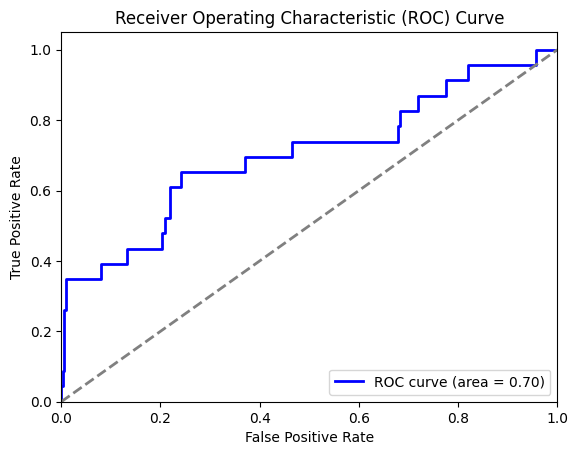

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

lr = LogisticRegression(max_iter=1000, random_state=0, class_weight = best_weights_c)
lr.fit(x_train_pca, y_train['Ciprofloxacin'])
y_pred = lr.predict_proba(x_test_pca)

fpr, tpr, thresholds = roc_curve(y_test['Ciprofloxacin'], y_pred[:, 1])
auc_score = roc_auc_score(y_test['Ciprofloxacin'], y_pred[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### ESTUDIO SEPARADO

In [ ]:

# import lightgbm as lgb

# model_cipro = lgb.LGBMClassifier(
#     objective='binary',
#     random_state=42,
#     n_estimators=500,
#     scale_pos_weight=None,
#     max_depth=5,
#     num_leaves=20,
#     learning_rate=0.05
# )

# model_cipro.fit(
#     x_train_pca, y_train['Ciprofloxacin'],
#     eval_set=[(x_val_pca, y_val['Ciprofloxacin'])],
#     eval_metric='binary_logloss',
#     callbacks=[lgb.early_stopping(stopping_rounds=10)]
# )

# evals_result_cipro = model_cipro.evals_result_
# epochs_cipro = range(1, len(evals_result_cipro['valid_0']['binary_logloss']) + 1)
# plt.figure(figsize=(8, 5))
# plt.plot(epochs_cipro, evals_result_cipro['valid_0']['binary_logloss'], label='Validation Loss')
# plt.xlabel('Iteraciones')
# plt.ylabel('Binary Logloss')
# plt.title('Evolución de la pérdida - Ciprofloxacin')
# plt.legend()
# plt.show()

# # Evaluación en test para Ciprofloxacin
# y_pred_test_cipro = model_cipro.predict(x_test_pca)
# print("Test Accuracy (Ciprofloxacin):", accuracy_score(y_test['Ciprofloxacin'], y_pred_test_cipro))
# print("Test Classification Report (Ciprofloxacin):")
# print(classification_report(y_test['Ciprofloxacin'], y_pred_test_cipro))
# y_pred_proba_cipro = model_cipro.predict_proba(x_test_pca)[:, 1]
# auc_cipro = roc_auc_score(y_test['Ciprofloxacin'], y_pred_proba_cipro)
# print("Test AUROC (Ciprofloxacin):", auc_cipro)
# fpr_cipro, tpr_cipro, _ = roc_curve(y_test['Ciprofloxacin'], y_pred_proba_cipro)
# plt.figure()
# plt.plot(fpr_cipro, tpr_cipro, color='blue', lw=2, label=f'ROC curve (AUC = {auc_cipro:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve - Ciprofloxacin')
# plt.legend(loc='lower right')
# plt.show()

### EXPLICABILIDAD

##### Erythromycin

In [ ]:
import shap
import matplotlib.pyplot as plt

# Entrenar el modelo de regresión logística
lr = LogisticRegression(max_iter=1000, random_state=0, class_weight = best_weights_e)
lr.fit(x_train_pca, y_train['Erythromycin'])

# Obtener los coeficientes del modelo
coef = lr.coef_[0]
intercept = lr.intercept_[0]
print("Coeficientes del modelo:", coef[:50],"...")
print("Intercepto del modelo:", intercept)

Coeficientes del modelo: [-0.10728271 -0.02164658  0.18844055 -0.2556162  -0.17557363 -0.02907766
  0.25165264  0.04099185  0.14100952  0.06792315  0.07742393 -0.01172417
 -0.0245869   0.07969376 -0.00465918  0.17435976 -0.13268537  0.09317687
  0.06886271  0.44628456 -0.4198498   0.38221019  0.19705213  0.11373181
 -0.01623209  0.03212124  0.03915357  0.26018741  0.02818834 -0.02129938
  0.38868524 -0.39168838  0.16143075  0.17468626 -0.42135916 -0.91775217
  0.0642774  -0.1326948  -0.58114079  0.13965659  0.22066399  0.22109724
  0.18529736  0.46383446  0.21015248  0.14187275 -0.29461138 -0.09437947
 -0.23256622  0.09167577] ...
Intercepto del modelo: -1.8108030332879272


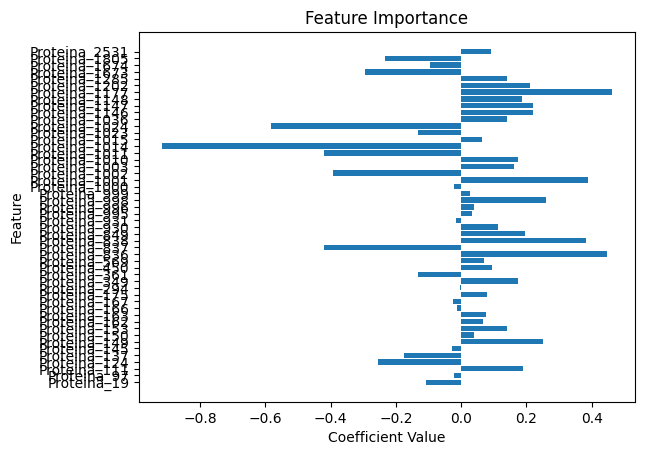

In [ ]:
# EXPLICABILIDAD 1
feature_names = np.array(selected_features)
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})

# Plot feature importance
plt.barh(feature_names, coef)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

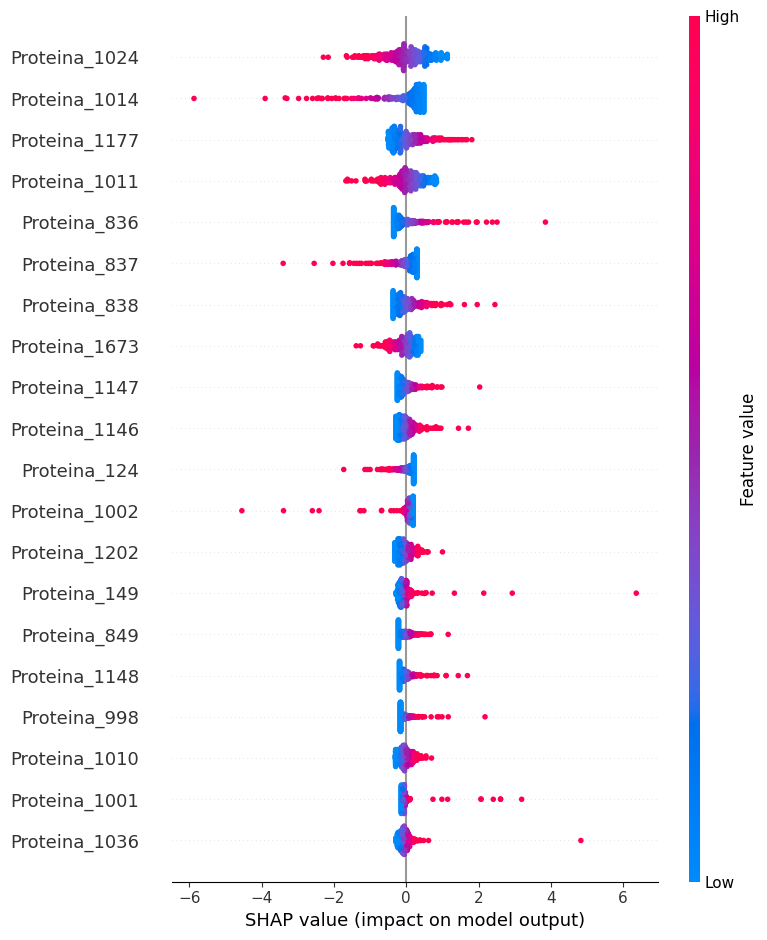

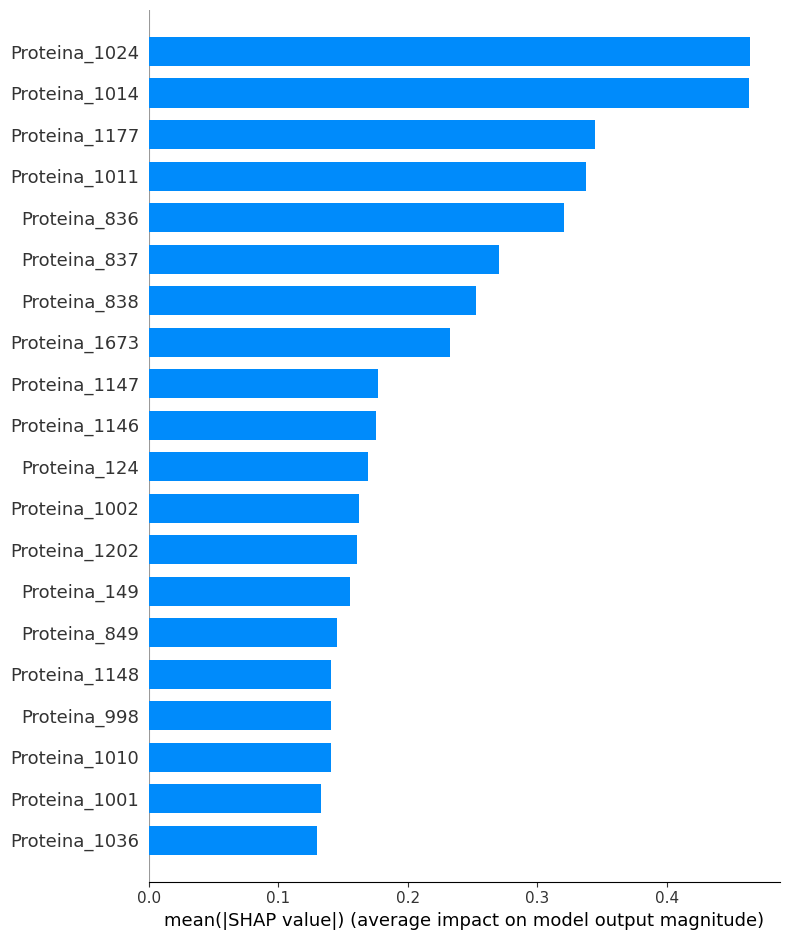

In [ ]:
# EXPLICABILIDAD 2
explainer = shap.Explainer(lr, x_test_pca)
shap_values = explainer(x_test_pca)

# Plot SHAP values
shap.summary_plot(shap_values, x_test_pca, feature_names=feature_names)
shap.summary_plot(shap_values, x_test_pca, feature_names=feature_names,plot_type="bar")

In [ ]:
# import shap

# # Entrenar el modelo de regresión logística
# lr = LogisticRegression(max_iter=1000, random_state=0, class_weight = best_weights_c)
# lr.fit(x_train_pca, y_train['Erythromycin'])

# # Obtener los coeficientes del modelo
# coef = lr.coef_[0]
# print("Coeficientes del modelo:", coef[:50],"...")

# # Calcular los odds ratios
# odds_ratios = np.exp(coef)
# print("Odds Ratios:", odds_ratios[:50], "...")

# # Usar SHAP para la explicabilidad
# explainer = shap.LinearExplainer(lr, x_train_pca,feature_perturbation="interventional")
# shap_values = explainer(x_test_pca)

# # Invertir la transformación PCA para los valores SHAP
# pca = pipeline.named_steps['pca']
# x_test_original = pca.inverse_transform(x_test_pca)

# # Seleccionar los 10 principales componentes de PCA
# top_10_indices = np.argsort(np.abs(coef))[-10:]
# x_test_top_10 = x_test_pca[:, top_10_indices]
# shap_values_top_10 = shap_values[:, top_10_indices]

# # print("Test: ",x_test_top_10.shape)
# # print("Indices de los 10 componentes principales:", shap_values_top_10.shape)
# # print("PCA components: ",pca.components_[top_10_indices,:],"(",pca.components_[top_10_indices,:].shape,")")

# # Mapear los valores SHAP al espacio original
# shap_values_original = shap_values_top_10 @ pca.components_[top_10_indices,:]

# # Visualizar los valores SHAP en el espacio original
# shap.summary_plot(shap_values_original, x_test_original)

# # Visualizar la importancia de las características en el espacio original
# shap.summary_plot(shap_values_original, x_test_original, plot_type="bar")

##### Ciprofloxacin

In [ ]:
import shap
import matplotlib.pyplot as plt

# Entrenar el modelo de regresión logística
lr = LogisticRegression(max_iter=1000, random_state=0, class_weight = best_weights_c)
lr.fit(x_train_pca, y_train['Ciprofloxacin'])

# Obtener los coeficientes del modelo
coef = lr.coef_[0]
intercept = lr.intercept_[0]
print("Coeficientes del modelo:", coef[:50],"...")
print("Intercepto del modelo:", intercept)

Coeficientes del modelo: [-0.09830674  0.27322668  0.03136563  0.10387501 -0.33605825  0.07393992
  0.3818094  -0.15791836  0.24462577  0.18178288  0.019926   -0.29681282
  0.26388967  0.23665858  0.01320233  0.50243246 -0.19730384  0.60524995
  0.29694156  0.165905   -0.37526406 -0.36869084 -0.21399537  0.23279345
 -0.27883352  0.00934886  0.07450365 -0.24341541  0.06903789 -0.048911
  0.81364357 -0.35409551  0.37552057  0.06493867 -0.49803455  0.23665121
 -0.40945648  0.14653206  0.06339284 -0.14777206 -0.00318372  0.60650725
 -0.65391384  0.21102937 -0.20240707  0.36249377  0.03841213 -0.47396905
  0.02809437  0.46906456] ...
Intercepto del modelo: -3.6050636985229234


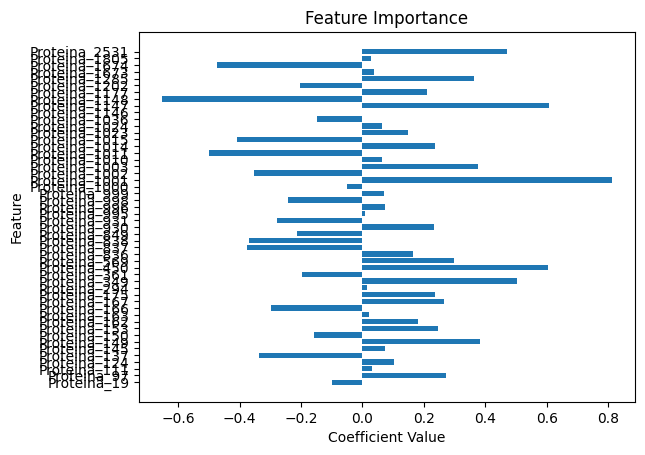

In [ ]:
# EXPLICABILIDAD 1
feature_names = np.array(selected_features)
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})

# Plot feature importance
plt.barh(feature_names, coef)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

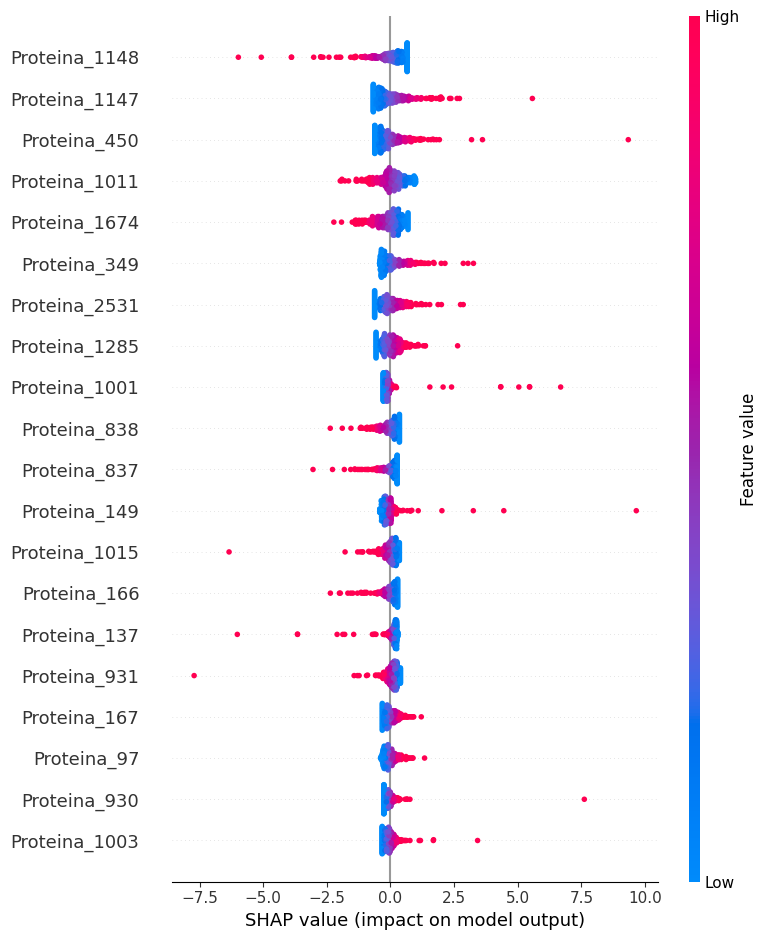

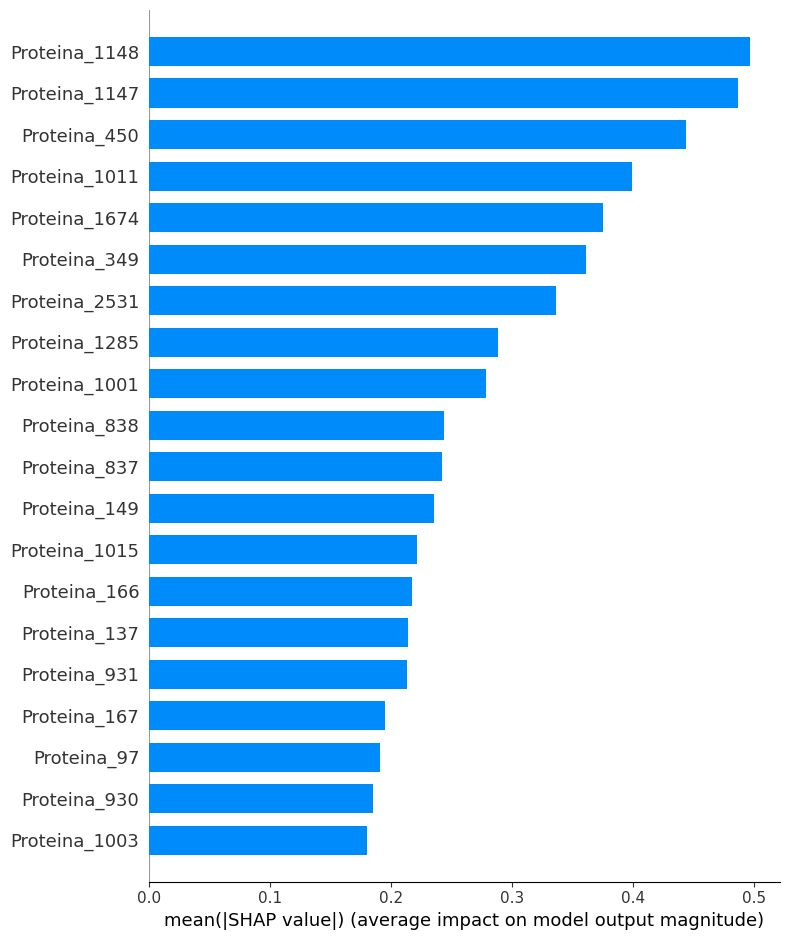

In [ ]:
# EXPLICABILIDAD 2
explainer = shap.Explainer(lr, x_test_pca)
shap_values = explainer(x_test_pca)

# Plot SHAP values
shap.summary_plot(shap_values, x_test_pca, feature_names=feature_names)
shap.summary_plot(shap_values, x_test_pca, feature_names=feature_names,plot_type="bar")

## MODELO B

#### PREPARAR LOS DATOS

### Pipeline

In [ ]:
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
import numpy as np

# Transformador personalizado para convertir valores menores de 1 a 0
def threshold_transform(X):
    X = np.array(X)
    X[X < 0.00005] = 0
    return X

# Crear una pipeline que primero normaliza los datos por columnas, luego aplica el transformador personalizado y finalmente aplica PCA
pipeline = Pipeline([
    # DIVIDIR
    ('threshold', FunctionTransformer(threshold_transform)),  # Convierte valores a 0
    ('multiplication', FunctionTransformer(lambda X: X * 100)),
    ('scaler', StandardScaler()),  # Normaliza los datos por columnas
    # ('selector', SelectKBest(f_classif, k=50))
    ('pca', PCA(n_components=0.95))  # Aplica PCA
])
print("Pipeline creada con éxito.")

Pipeline creada con éxito.


In [ ]:
x_train_pca = pipeline.fit_transform(x_train,y_train['Clase'])
x_val_pca = pipeline.transform(x_val)
x_test_pca = pipeline.transform(x_test)

print(f"Original number of features: {x_train.shape[1]}")
print(f"Reduced number of features after PCA: {x_train_pca.shape[1]}")

Original number of features: 6000
Reduced number of features after PCA: 803


In [ ]:
import torch
import torch.nn as nn

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train_pca, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

x_val_tensor = torch.tensor(x_val_pca, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

x_test_tensor = torch.tensor(x_test_pca, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)


In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers, sigma):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        self.sigma = sigma
        self.input_size = input_size

        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.n_layers, x.size(0), self.hidden_dim).to(x.device)
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
# Parámetros del modelo
input_size = 1
output_size = 4 #Una por clase
hidden_dim = 128
n_layers = 2
sigma = 0.1

# Crear una instancia del clasificador RNN
model = RNN(input_size, output_size, hidden_dim, n_layers, sigma)

In [ ]:
T = x_train_pca.shape[1]
X = torch.Tensor(x_train_pca).view([-1,T,1])
# Pasar los datos a través del modelo
output = model(X)

print("Output:", output)

Output: tensor([[-0.0275, -0.0174,  0.0181, -0.0125],
        [-0.0443,  0.0108,  0.0741, -0.0190],
        [-0.1146, -0.0593,  0.0434,  0.0413],
        ...,
        [-0.0272, -0.0147,  0.0080,  0.0083],
        [-0.0574, -0.0679, -0.0107,  0.0025],
        [-0.0218, -0.0196,  0.0104, -0.0097]], grad_fn=<AddmmBackward0>)


#### UNIDO

In [ ]:
from sklearn.metrics import roc_auc_score

class RNN_extended(RNN):
    def __init__(self, num_data_train, num_iter, sequence_length, patience,
                 input_size, output_size, hidden_dim, n_layers, sigma, class_weights, lr=0.001):
        super().__init__(input_size, output_size, hidden_dim, n_layers, sigma)

        self.hidden_dim = hidden_dim
        self.sequence_length = sequence_length
        self.num_layers = n_layers
        self.lr = lr
        self.num_train = num_data_train
        self.num_iter = num_iter
        self.patience = patience

        # Weights to tensor
        class_weights_tensor = torch.tensor([class_weights[i] for i in range(len(class_weights))])

        self.criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
        self.optim = torch.optim.Adam(self.parameters(), lr=self.lr)

        self.loss_during_training = []
        self.loss_during_validation = []
        self.auc_during_validation = []

    def trainloop(self, x_train, y_train, x_val, y_val):
        best_val_auc = 0
        patience_counter = 0

        for e in range(int(self.num_iter)):
            self.optim.zero_grad()

            x = torch.Tensor(x_train).view([self.num_train, self.sequence_length, self.input_size])
            y = torch.Tensor(y_train).type(torch.LongTensor)

            # Ensure target labels are within the expected range
            if y.max() >= self.fc.out_features or y.min() < 0:
                raise ValueError(f"Target labels should be in the range [0, {self.fc.out_features - 1}]")

            output = self.forward(x)

            loss = self.criterion(output, y)
            loss.backward()

            nn.utils.clip_grad_norm_(self.parameters(), 2.0)
            self.optim.step()

            self.loss_during_training.append(loss.item())

            # Validación
            val_loss, val_accuracy, val_auc = self.validate(x_val, y_val)
            self.loss_during_validation.append(val_loss)
            self.auc_during_validation.append(val_auc)

            if e % 50 == 0:
                print(f"Iteración {e}. Pérdida de entrenamiento: {loss.item()}. Pérdida de validación: {val_loss}. AUC de validación: {val_auc:.2f}")

            # Early stopping
            if val_auc > best_val_auc:
                best_val_auc = val_auc
                patience_counter = 0
            elif val_auc/best_val_auc < 0.8:
                print(f"Early stopping en la iteración {e} por perdida demasiado grande. Mejor pérdida de validación: {best_val_auc}")
                break
            else:
                patience_counter += 1

            if patience_counter >= self.patience:
                print(f"Early stopping en la iteración {e}. Mejor pérdida de validación: {best_val_auc}")
                break

    def validate(self, x_val, y_val):
        self.eval()  # Poner el modelo en modo evaluación
        with torch.no_grad():
            x_val = torch.Tensor(x_val).view([-1, self.sequence_length, self.input_size])
            y_val = torch.Tensor(y_val).type(torch.LongTensor)

            output = self.forward(x_val)
            loss = self.criterion(output, y_val)
            _, predicted = torch.max(output.data, 1)

            correct = (predicted == y_val).sum().item()
            total = y_val.size(0)
            accuracy = correct / total

            # Calcular AUC
            y_val_one_hot = torch.nn.functional.one_hot(y_val, num_classes=self.fc.out_features).numpy()
            output_prob = torch.nn.functional.softmax(output, dim=1).numpy()
            auc = roc_auc_score(y_val_one_hot, output_prob, multi_class='ovr')

            return loss.item(), accuracy, auc

    def evaluate(self, x_test, y_test):
        self.eval()  # Set the model to evaluation mode
        with torch.no_grad():
            x_test = torch.Tensor(x_test).view([-1, self.sequence_length, self.input_size])
            y_test = torch.Tensor(y_test).type(torch.LongTensor)

            output = self.forward(x_test)
            _, predicted = torch.max(output.data, 1)

            correct = (predicted == y_test).sum().item()
            total = y_test.size(0)
            accuracy = correct / total

            # Calcular AUC Global
            y_test_one_hot = torch.nn.functional.one_hot(y_test, num_classes=self.fc.out_features).numpy()
            output_prob = torch.nn.functional.softmax(output, dim=1).numpy()
            auc = roc_auc_score(y_test_one_hot, output_prob, multi_class='ovr')

            print(f"Accuracy: {accuracy * 100:.2f}%. AUC: {auc:.2f}")

            # Calcular AUC por clase
            y_test_one_hot = torch.nn.functional.one_hot(y_test, num_classes=self.fc.out_features).numpy()
            output_prob = torch.nn.functional.softmax(output, dim=1).numpy()
            auc_per_class = {}
            for i in range(self.fc.out_features):
                auc_per_class[i] = roc_auc_score(y_test_one_hot[:, i], output_prob[:, i])
                print(f"AUC para la clase {i}: {auc_per_class[i]:.2f}")

            return accuracy, auc, auc_per_class


In [ ]:
best_weights = {0: 0.0007535795026375283, 1: 0.003484320557491289, 2: 0.016666666666666666, 3: 0.017543859649122806}

In [ ]:
torch.manual_seed(1234)
np.random.seed(1234)
my_rnn = RNN_extended(num_data_train=x_train_pca.shape[0],num_iter=200,sequence_length=T, class_weights=best_weights,
                      input_size=1,output_size=4,hidden_dim=32,n_layers=1,sigma=0.1,lr=0.005, patience = 20)

In [ ]:
my_rnn.trainloop(x_train_pca, y_train['Clase'].values,x_val_pca, y_val['Clase'].values)

Iteración 0. Pérdida de entrenamiento: 1.406197190284729. Pérdida de validación: 1.406762719154358. AUC de validación: 0.46
Iteración 50. Pérdida de entrenamiento: 1.311002492904663. Pérdida de validación: 1.4259637594223022. AUC de validación: 0.53
Early stopping en la iteración 72. Mejor pérdida de validación: 0.5317665146232242


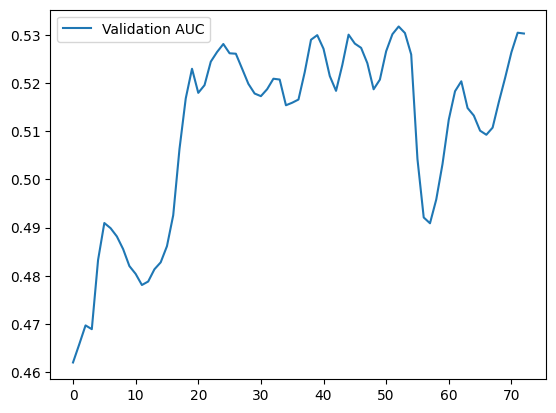

In [ ]:
plt.plot(my_rnn.auc_during_validation,label='Validation AUC')
plt.legend()

In [ ]:
my_rnn.evaluate(x_test_pca, y_test['Clase'].values)

Accuracy: 16.71%. AUC: 0.50
AUC para la clase 0: 0.48
AUC para la clase 1: 0.54
AUC para la clase 2: 0.58
AUC para la clase 3: 0.42


(0.16714697406340057,
 0.5029217809771152,
 {0: 0.4766081871345029,
  1: 0.5388975062641689,
  2: 0.5805970149253732,
  3: 0.4155844155844155})

#### DIVIDIDO

##### RNN model

In [ ]:
# Parámetros del modelo
input_size = 1
output_size = 2 #Una por clase
hidden_dim = 128
n_layers = 2
sigma = 0.1

# Crear una instancia del clasificador RNN
model = RNN(input_size, output_size, hidden_dim, n_layers, sigma)

In [ ]:
T = x_train_pca.shape[1]
X = torch.Tensor(x_train_pca).view([-1,T,1])
# Pasar los datos a través del modelo
output = model(X)

print("Output:", output)

Output: tensor([[ 0.0841, -0.0771],
        [ 0.0674, -0.0489],
        [-0.0029, -0.1191],
        ...,
        [ 0.0845, -0.0745],
        [ 0.0543, -0.1277],
        [ 0.0899, -0.0794]], grad_fn=<AddmmBackward0>)


##### RNN Extended

In [ ]:
from sklearn.metrics import roc_auc_score

class RNN_extended(RNN):
    def __init__(self, num_data_train, num_iter, sequence_length, patience,
                 input_size, output_size, hidden_dim, n_layers, sigma, class_weights={0:1,1:1}, lr=0.001):
        super().__init__(input_size, output_size, hidden_dim, n_layers, sigma)

        self.hidden_dim = hidden_dim
        self.sequence_length = sequence_length
        self.num_layers = n_layers
        self.lr = lr
        self.num_train = num_data_train
        self.num_iter = num_iter
        self.patience = patience

        # Weights to tensor
        class_weights_tensor = torch.tensor([class_weights[i] for i in range(len(class_weights))], dtype=torch.float32)

        self.criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
        self.optim = torch.optim.Adam(self.parameters(), lr=self.lr)

        self.loss_during_training = []
        self.loss_during_validation = []
        self.auc_during_validation = []

    def trainloop(self, x_train, y_train, x_val, y_val):
        best_val_auc = 0
        patience_counter = 0

        for e in range(int(self.num_iter)):
            self.optim.zero_grad()

            x = torch.Tensor(x_train).view([self.num_train, self.sequence_length, self.input_size])
            y = torch.Tensor(y_train).type(torch.LongTensor)

            # Ensure target labels are within the expected range
            if y.max() >= self.fc.out_features or y.min() < 0:
                raise ValueError(f"Target labels should be in the range [0, {self.fc.out_features - 1}]")

            output = self.forward(x)

            loss = self.criterion(output, y)
            loss.backward()

            nn.utils.clip_grad_norm_(self.parameters(), 2.0)
            self.optim.step()

            self.loss_during_training.append(loss.item())

            # Validación
            val_loss, val_accuracy, val_auc = self.validate(x_val, y_val)
            self.loss_during_validation.append(val_loss)
            self.auc_during_validation.append(val_auc)

            if e % 50 == 0:
                print(f"Iteración {e}. Pérdida de entrenamiento: {loss.item()}. Pérdida de validación: {val_loss}. AUC de validación: {val_auc:.2f}")

            # Early stopping
            if val_auc > best_val_auc:
                best_val_auc = val_auc
                patience_counter = 0
            elif val_auc/best_val_auc < 0.8:
                print(f"Early stopping en la iteración {e} por perdida demasiado grande. Mejor pérdida de validación: {best_val_auc}")
                break
            else:
                patience_counter += 1

            if patience_counter >= self.patience:
                print(f"Early stopping en la iteración {e}. Mejor pérdida de validación: {best_val_auc}")
                break

    def validate(self, x_val, y_val):
        self.eval()  # Poner el modelo en modo evaluación
        with torch.no_grad():
            x_val = torch.Tensor(x_val).view([-1, self.sequence_length, self.input_size])
            y_val = torch.Tensor(y_val).type(torch.LongTensor)

            output = self.forward(x_val)
            loss = self.criterion(output, y_val)
            _, predicted = torch.max(output.data, 1)

            correct = (predicted == y_val).sum().item()
            total = y_val.size(0)
            accuracy = correct / total

            # Calcular AUC
            output_prob = torch.nn.functional.softmax(output, dim=1)[:, 1].numpy()
            auc = roc_auc_score(y_val.numpy(), output_prob)

            return loss.item(), accuracy, auc

    def evaluate(self, x_test, y_test):
        self.eval()  # Set the model to evaluation mode
        with torch.no_grad():
            x_test = torch.Tensor(x_test).view([-1, self.sequence_length, self.input_size])
            y_test = torch.Tensor(y_test).type(torch.LongTensor)

            output = self.forward(x_test)
            _, predicted = torch.max(output.data, 1)

            correct = (predicted == y_test).sum().item()
            total = y_test.size(0)
            accuracy = correct / total

            # Calcular el AUC
            output_prob = torch.nn.functional.softmax(output, dim=1)[:, 1].numpy()
            auc = roc_auc_score(y_test.numpy(), output_prob)

            return accuracy, auc


###### Erythromycin


In [ ]:
best_weights_e

{0: 3, 1: 0.33}

In [ ]:
torch.manual_seed(1234)
np.random.seed(1234)
my_rnn = RNN_extended(num_data_train=x_train_pca.shape[0],num_iter=200,sequence_length=T, class_weights=best_weights_e,
                      input_size=1,output_size=2,hidden_dim=32,n_layers=1,sigma=0.1,lr=0.005, patience = 10)

In [ ]:
my_rnn.trainloop(x_train_pca, y_train['Erythromycin'].values,x_val_pca, y_val['Erythromycin'].values)

Iteración 0. Pérdida de entrenamiento: 0.643517792224884. Pérdida de validación: 0.5697486996650696. AUC de validación: 0.42
Early stopping en la iteración 24. Mejor pérdida de validación: 0.5722358722358722


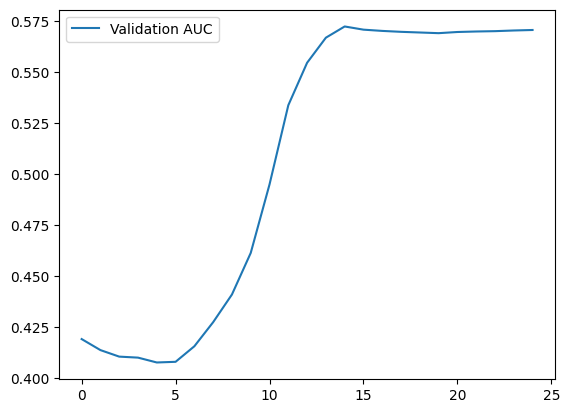

In [ ]:
plt.plot(my_rnn.auc_during_validation,label='Validation AUC')
plt.legend()

In [ ]:
my_rnn.evaluate(x_test_pca, y_test['Erythromycin'].values)

(0.8011527377521613, 0.5217912626420602)

###### Erythromycin


In [ ]:
best_weights_c

{0: 0.5, 1: 2}

In [ ]:
torch.manual_seed(1234)
np.random.seed(1234)
my_rnn = RNN_extended(num_data_train=x_train_pca.shape[0],num_iter=200,sequence_length=T, class_weights=best_weights_c,
                      input_size=1,output_size=2,hidden_dim=32,n_layers=1,sigma=0.1,lr=0.005, patience = 10)

In [ ]:
my_rnn.trainloop(x_train_pca, y_train['Ciprofloxacin'].values,x_val_pca, y_val['Ciprofloxacin'].values)

Iteración 0. Pérdida de entrenamiento: 0.6639266014099121. Pérdida de validación: 0.6169296503067017. AUC de validación: 0.61
Early stopping en la iteración 16. Mejor pérdida de validación: 0.6299469604243165


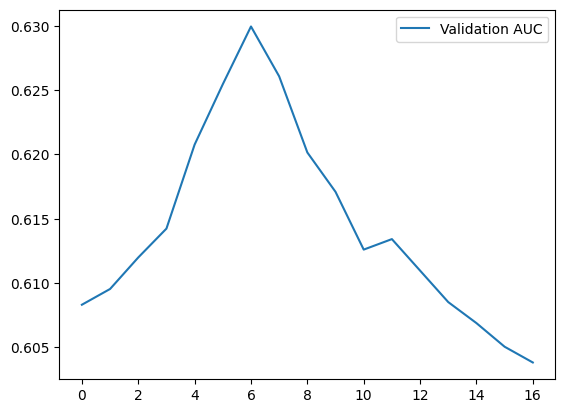

In [ ]:
plt.plot(my_rnn.auc_during_validation,label='Validation AUC')
plt.legend()

In [ ]:
my_rnn.evaluate(x_test_pca, y_test['Ciprofloxacin'].values)

(0.9337175792507204, 0.4840311325818572)